# FEATURE ANALYSIS: IN-DEPTH ANALYSIS OF RELATIONSHIPS BETWEEN VARIABLES, MODEL DEVELOPMENT AND EVALUATION

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("tracks_df.csv")
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [2]:
df.describe()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,popularity,explicit,available_markets,tempo,loudness,duration_min
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.637501,0.652161,5.388235,0.510217,0.098863,0.230169,0.052663,0.182281,0.519324,0.610780,0.226006,0.907563,3.284211,3.806811,3.859443
std,0.157052,0.197154,3.541887,0.500050,0.096288,0.261785,0.183341,0.142708,0.220216,0.180764,0.418373,0.261913,1.864118,1.761794,1.174147
min,0.159000,0.047200,0.000000,0.000000,0.023200,0.000003,0.000000,0.021500,0.039800,0.010000,0.000000,0.012658,0.000000,0.000000,1.000000
25%,0.531000,0.528000,2.000000,0.000000,0.038500,0.029250,0.000000,0.094400,0.347500,0.510000,0.000000,0.987342,1.000000,2.000000,3.000000
50%,0.654000,0.674000,6.000000,1.000000,0.056900,0.115000,0.000003,0.125000,0.519000,0.650000,0.000000,1.000000,3.000000,4.000000,4.000000
75%,0.755000,0.806000,9.000000,1.000000,0.115000,0.350500,0.000656,0.220500,0.680500,0.740000,0.000000,1.000000,5.000000,5.000000,4.000000
max,0.970000,0.990000,11.000000,1.000000,0.618000,0.978000,0.967000,0.943000,0.980000,1.000000,1.000000,1.000000,6.000000,6.000000,21.000000


Unordered Categorical Values: "key", "time_signature", "mode", "explicit"

Ordered Categorical Values: "tempo", "loudness", "duration_min"

Numerical Values: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "available_markets", "popularity"

Audio-Specific Features: "danceability", "energy", "speechiness", "acousticness",
    "instrumentalness", "liveness", "valence", "mode", "key", "time_signature",
    "tempo", "loudness", "duration_min"

Success Metrics: "popularity", "available_markets"

Unique Features: 'id', 'name', 'release_date', 'artists'

# Q1: IS POPULARITY CORRELATED TO THE COUNT OF AVAILABLE MARKETS?

In [3]:
df[["available_markets", "popularity"]].corr()

,available_markets,popularity
available_markets,1.000000,0.005568
popularity,0.005568,1.000000


Result: No correlation between available markets and popularity maybe because all songs are available in such markets no matter they are popular.

# Q2: WHICH VARIABLES ARE STATISTICALLY THE MOST IMPORTANT FOR POPULARITY?

                          0
 0.043033      danceability
 0.049474            energy
-0.048828       speechiness
 0.041741              mode
-0.073865      acousticness
-0.213309  instrumentalness
-0.052954          liveness
-0.051170           valence
 0.075325          explicit
-0.003892             tempo
-0.002640          loudness
-0.019665      duration_min


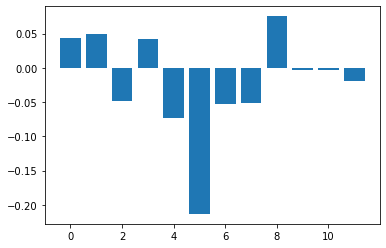

In [4]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "explicit", "tempo", "loudness", "duration_min"]]
y = df["popularity"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: Popularity is not dependent upon any of these features.

# Q3: WHICH VARIABLES ARE PROBABLY CORRELATED?

In [5]:
corr_matrix = pd.DataFrame(df.corr().fillna(0))
corr_pos = corr_matrix[corr_matrix > 0.3].notnull()
corr_neg = corr_matrix[corr_matrix < -0.3].notnull()
columns = indexes = corr_pos.columns
for row in range(len(indexes)):
    for col in range(len(columns)):
        if(row <= col):
            pass
        elif(corr_pos.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")
        elif(corr_neg.iloc[row, col] == True):
            print(indexes[row], " <-> ", columns[col], "(", corr_matrix.iloc[row, col], ")")

acousticness  <->  energy ( -0.6580963839630152 )
valence  <->  danceability ( 0.31304898636897893 )
valence  <->  energy ( 0.37708569533895375 )
explicit  <->  danceability ( 0.30953418110980735 )
explicit  <->  speechiness ( 0.4300130530479975 )
loudness  <->  energy ( 0.4018137463778709 )


=> Energy of the song is dependent on loudness and valence of the song, and most importantly, inversely proportional on acousticness. 

=> Whether a song is explicit is correlated to danceability, popularity and speechiness. In Speechiness <-> Explicit relationship, there is nothing to examine, because it is a no-brainer to think that speechiness is the necessary condition to have an explicit song. Popularity and danceability seem to be suitable for further analysis.

=> Valence is correlated to not also energy but also danceability, which makes sense.

# Q4: MAY MODE AND KEY HAVE RELATIONSHIP WITH OTHER AUDIO FEATURES ?  

Key: The note that the song is based on (e.g. C, D#, G)

Mode: Whether the key is followed  by a minor or a major chord progression

Key & Mode: 12 * 2 = 24 possible combinations

Key: [0-11] => [C-B] / Mode: [0, 1] => [Minor, Major]

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'popularity', 'explicit',
       'id', 'name', 'release_date', 'artists', 'available_markets', 'tempo',
       'loudness', 'duration_min'],
      dtype='object')

In [7]:
df_group = df[["energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "mode", "key"]].groupby(["mode", "key"]).mean()
df_group.describe()

,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.650390,0.096301,0.237961,0.050673,0.181921,0.515313
std,0.033367,0.023894,0.055165,0.026484,0.015031,0.042531
min,0.591000,0.056467,0.140349,0.004228,0.155807,0.440409
25%,0.627042,0.077464,0.205441,0.030643,0.171646,0.489317
50%,0.648009,0.096502,0.225106,0.048617,0.180829,0.514864
75%,0.674378,0.118252,0.281055,0.067099,0.191506,0.546580
max,0.715033,0.135825,0.339992,0.102080,0.209610,0.583462


Result: The selection of any special key or mode does not play a key role on any feature.

                          0
-0.031445      danceability
 0.124259            energy
 0.331383       speechiness
-0.119823      acousticness
 0.085184  instrumentalness
 0.002087          liveness
 0.022105           valence


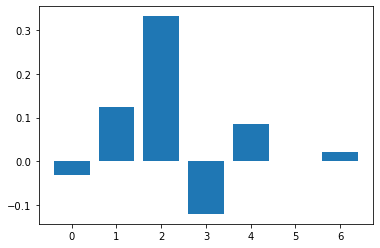

In [8]:
model = LinearRegression()
X = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
y = df["mode"]
model.fit(X, y)
importance = model.coef_
print(pd.DataFrame(X.columns, importance))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Result: The most important feature related to the mode of the song is speechiness

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn import metrics

treemodel = tree.DecisionTreeClassifier()
svmmodel = svm.SVC(kernel = "linear")
logmodel = LogisticRegression()

X = np.array(df["speechiness"]).reshape(-1, 1) 
y = df["mode"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

treemodel.fit(X_train, y_train)
svmmodel.fit(X_train, y_train)
logmodel.fit(X_train, y_train)

y_pred_svm = svmmodel.predict(X_test)
y_pred_tree = treemodel.predict(X_test)
y_pred_log = logmodel.predict(X_test)

print("treemodel: ", cross_val_score(treemodel, X, y, cv = 5).mean())
print("svmmodel: ", cross_val_score(svmmodel, X, y, cv = 5).mean())
print("logmodel: ", cross_val_score(logmodel, X, y, cv = 5).mean())

logfunction = [x[0] for x in logmodel.predict_proba(X)]

treemodel:  0.4879256965944273
svmmodel:  0.5102167182662539
logmodel:  0.530030959752322


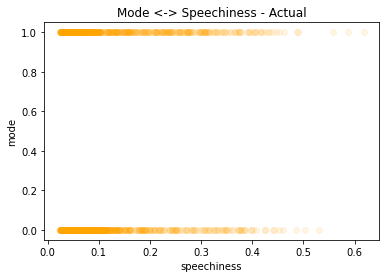

In [10]:
plt.scatter(X, abs([round(log) for log in logfunction] - y), color = "orange", alpha = 0.1)
plt.xlabel("speechiness")
plt.ylabel("mode")
plt.title("Mode <-> Speechiness - Actual")
plt.show()

Result: Despite the fact that the correlation coefficients between mode and other features are moderately significant, none of these features necessarily achieve information gain, as seen above. 

In [11]:
df_key = pd.get_dummies(df["key"], drop_first = True)
df_y = df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
for y_val in df_y.columns:
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df_key, df[y_val], test_size = 0.2)
    model.fit(X_train, y_train)
    print(y_val, cross_val_score(model, df_key, df[y_val], cv = 5).mean())

danceability -0.032672095532053566
energy -0.05836590310393426
speechiness -0.013075675463522196
acousticness -0.04440337940150305
instrumentalness -0.09356651034092284
liveness -0.0236337640060043
valence -0.009972259284559049


Result: The key of the song does not play any role on these features

# Q5: ENERGY <-> LOUDNESS, VALENCE, ACOUSTICNESS

In [80]:
X = df[["valence", "loudness", "acousticness"]]
y = df["energy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
svmmodel = svm.SVR(kernel = "linear", C = 0.8)
svmmodel.fit(X_train, y_train)
print("R2: ", metrics.r2_score(y_test, svmmodel.predict(X_test)), "CV: ", cross_val_score(svmmodel, X, y, cv = 5).mean())

R2:  0.5121020492691137 CV:  0.5302257184855022


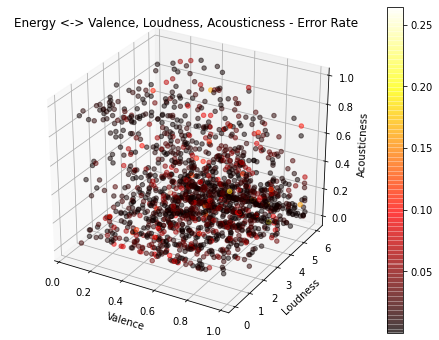

In [81]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["valence"], df["loudness"], df["acousticness"], cmap = "hot", c = (svmmodel.predict(X) - df["energy"])**2, alpha = 0.5)
ax.set_title("Energy <-> Valence, Loudness, Acousticness - Error Rate")
ax.set_xlabel("Valence")
ax.set_ylabel("Loudness")
ax.set_zlabel("Acousticness")
fig.colorbar(p)
plt.show()

Result: As long as that R2-Score and Cross-Validation Score of the given Support-Vector-Regression Model are above 0.50, we can assure that valence, loudness and acousticness are indeed good predictors of the energy of the song. Accuracy of the model peaks when the regularization parameter C is equal to 0.8.

# Q6: EXPLICIT <-> POPULARITY, DANCEABILITY, SPEECHINESS

In [83]:
from scipy.stats import pearsonr
X = df[["speechiness", "danceability", "popularity"]]
y = df["explicit"]
c1, p1 = pearsonr(X["popularity"], y) # :0.30 with very low error
c2, p2 = pearsonr(X["danceability"], y) # :0.34 with very low error
c3, p3 = pearsonr(X["speechiness"], y) #0.38 with very low error

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print(metrics.r2_score(y_test ,logmodel.predict(X_test)))

-0.18639225746268617


Result: Based on speechiness, popularity and danceability of a song, we cannot predict with whether the content of a song is explicit or not.

# Q7: VALENCE <-> ENERGY, DANCEABILITY

In [118]:
X = df[["danceability", "energy"]]
y = df["valence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
metrics.r2_score(y_test, svm.SVR().fit(X_train, y_train).predict(X_test))

0.21583870630490998

Result: Despite the fact that valence of any song seem to be moderately correlated to energy and danceability, the overall score of model is too low, so valence is not to be predicted based on danceability or energy.